### Import required library 

In [1]:
import pandas as pd #used for data manipulation or analysis 
import numpy as np #handles mathematical operations 
import matplotlib.pyplot as plt #--- for visualization ---
import seaborn as sns #--- for visualization ---

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Import your Data 

In [2]:
my_data = pd.read_csv("C:\\Users\\ADMIN\\Desktop\\archive\\diabetes.csv")

my_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
my_data.info()
my_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


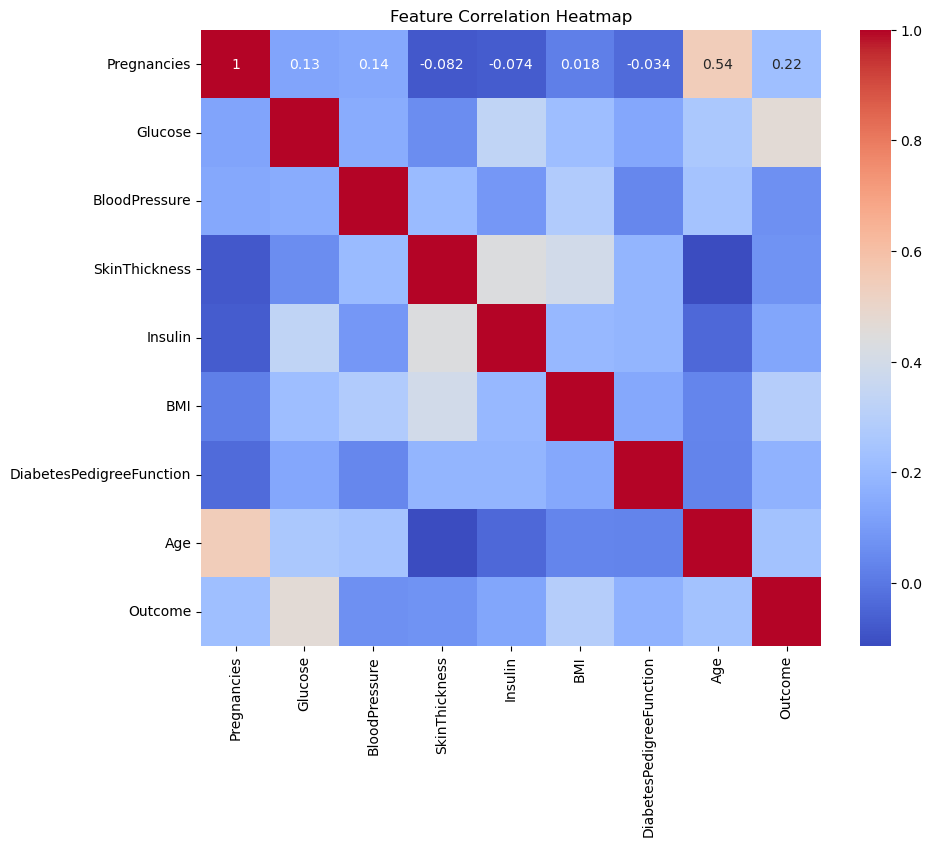

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(my_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [5]:
#from sklearn.model_selection import train_test_split

X = my_data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = my_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
X_train, X_test, y_train, y_test 

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 60             2       84              0              0        0   0.0   
 618            9      112             82             24        0  28.2   
 346            1      139             46             19       83  28.7   
 294            0      161             50              0        0  21.9   
 231            6      134             80             37      370  46.2   
 ..           ...      ...            ...            ...      ...   ...   
 71             5      139             64             35      140  28.6   
 106            1       96            122              0        0  22.4   
 270           10      101             86             37        0  45.6   
 435            0      141              0              0        0  42.4   
 102            0      125             96              0        0  22.5   
 
      DiabetesPedigreeFunction  Age  
 60                      0.304   21  
 618                  

In [7]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Accuracy: 0.75


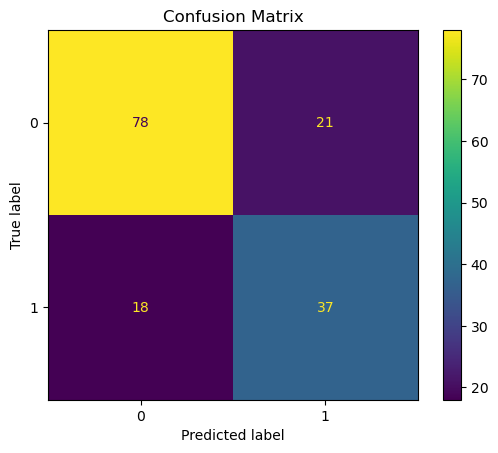

In [8]:
# Predict and evaluate
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()
